<a href="https://colab.research.google.com/github/fakoliba/Computer-vision/blob/main/Computer_vision_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import cv2
import seaborn as sns


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report  # Import classification_report

import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
# Uncomment and run the below code if you are using google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the files file of dataset
labels  = pd.read_csv("/content/drive/MyDrive/class/Labels.csv")

In [ ]:
#Load the images
image = np.load("/content/drive/MyDrive/class/images.npy")
# Using np.load() to load the NumPy array from the .npy file

## Data Overview

### Understand the shape of the dataset

In [ ]:
#Checking the first row of the dataset
labels.shape
image.shape

(4750, 128, 128, 3)

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

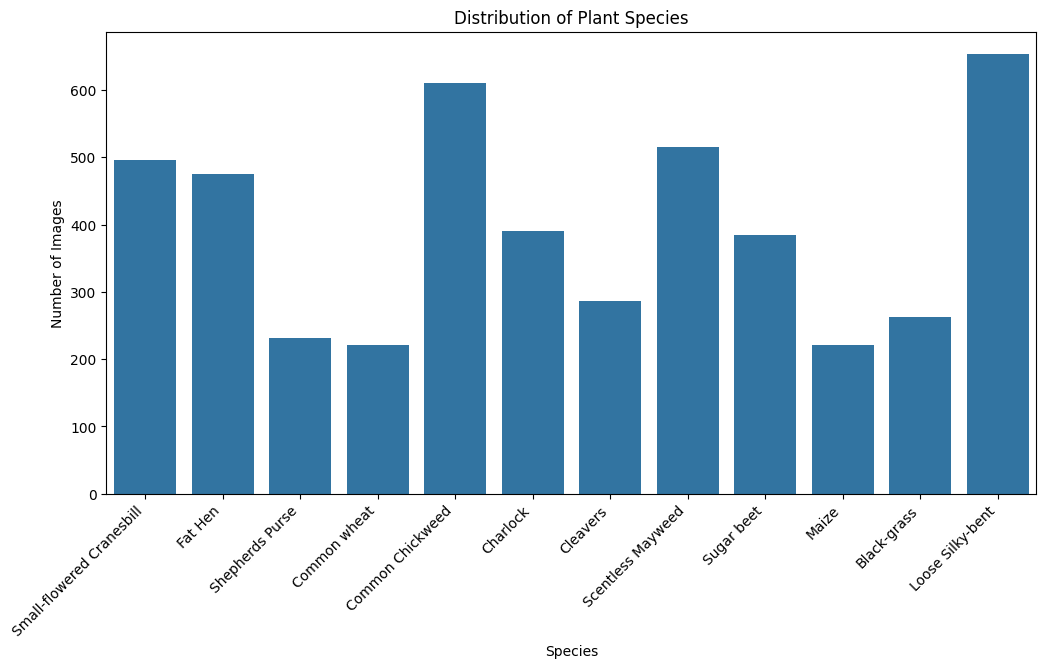

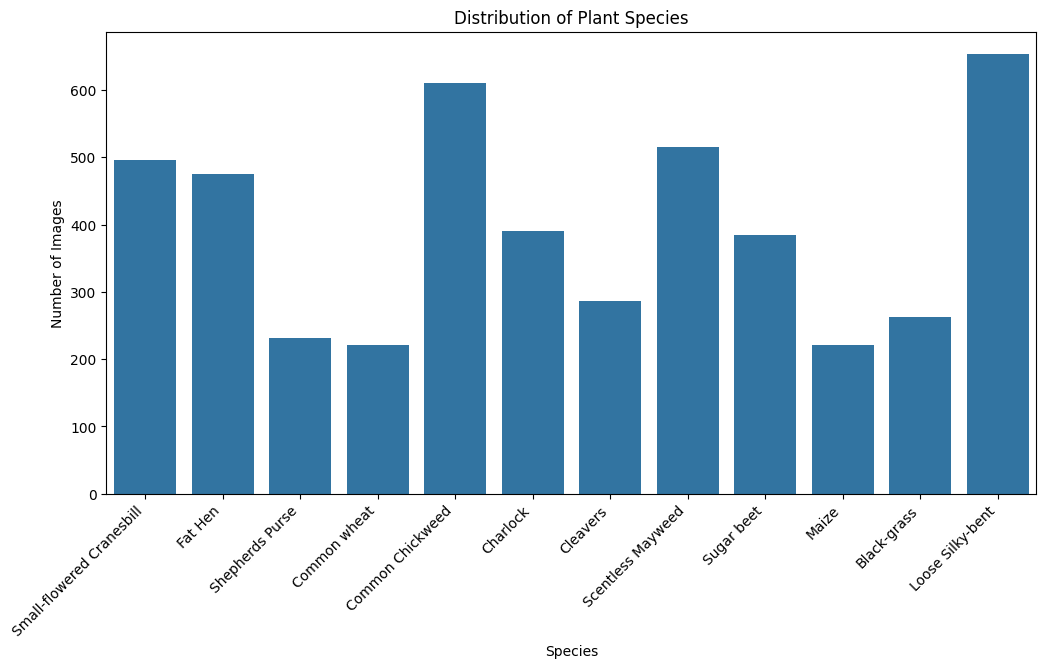

In [ ]:

# Assuming 'labels' DataFrame contains a column named 'Label' with species labels
species_counts = labels['Label'].value_counts()

plt.figure(figsize=(12, 6))
sns.countplot(x='Label', data=labels)  # Changed 'species' to 'Label' here as well
plt.title('Distribution of Plant Species')
plt.xlabel('Species')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.show()
species_counts = labels['Label'].value_counts()

plt.figure(figsize=(12, 6))
sns.countplot(x='Label', data=labels)  # Changed 'species' to 'Label' here as well
plt.title('Distribution of Plant Species')
plt.xlabel('Species')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.show()

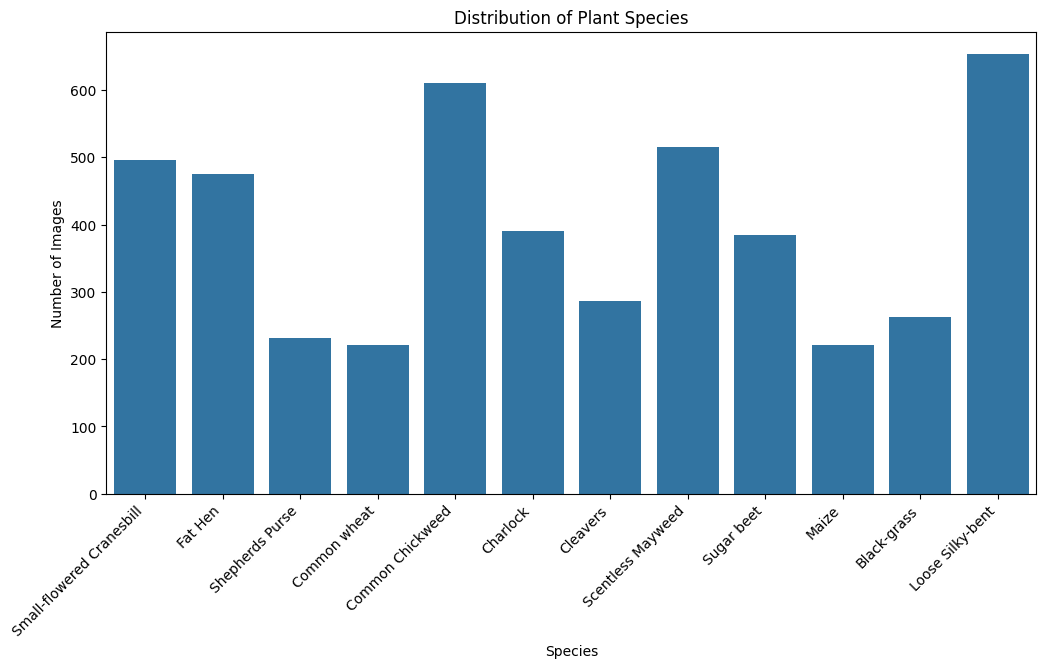

In [ ]:
# prompt: Is the dataset provided an imbalance? (Check with using bar plots)

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'labels' DataFrame is already loaded and contains a 'Label' column
plt.figure(figsize=(12, 6))
sns.countplot(x='Label', data=labels)
plt.title('Distribution of Plant Species')
plt.xlabel('Species')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.show()

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [ ]:
# Convert the BGR images to RGB images.

import cv2
rgb_images = []
for img in image:
  rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  rgb_images.append(rgb_img)

# Now 'rgb_images' is a list of RGB images
# We can convert it back to a NumPy array if needed
rgb_images = np.array(rgb_images)

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
#Resize images
resized_images = []
for img in rgb_images:
    resized_img = cv2.resize(img, (64, 64))  # Resize to 128x128 pixels
    resized_images.append(resized_img)

resized_images = np.array(resized_images)

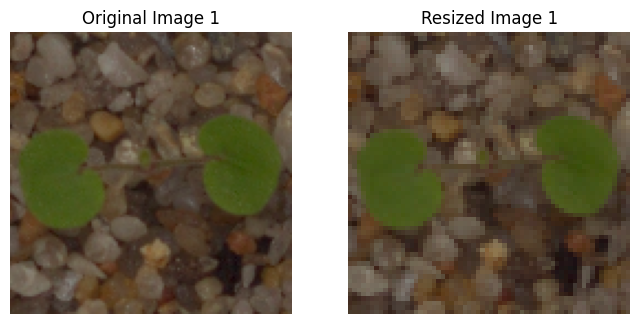

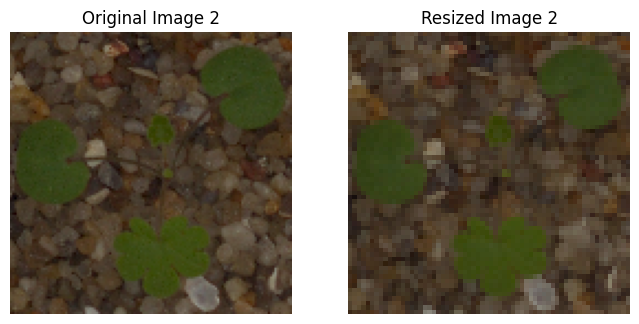

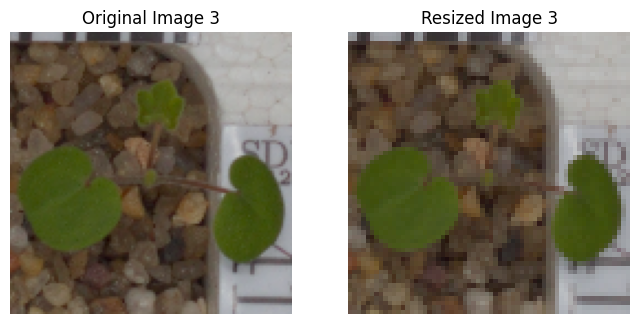

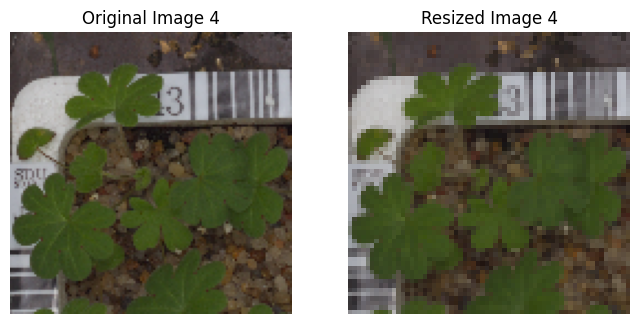

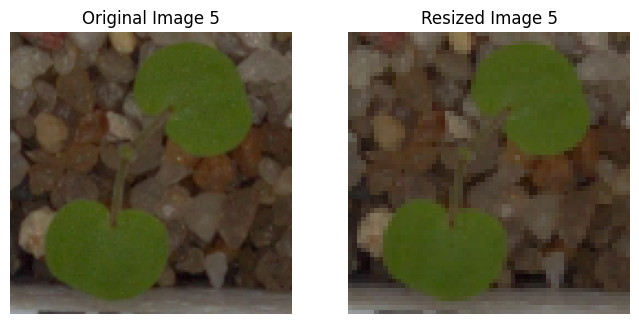

In [ ]:
#Image before and after resizing
# Display original and resized images side-by-side
num_images_to_display = 5  # Adjust the number of images to display as needed

for i in range(num_images_to_display):
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(rgb_images[i])
    plt.title(f"Original Image {i+1}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(resized_images[i])
    plt.title(f"Resized Image {i+1}")
    plt.axis('off')

    plt.show()

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [ ]:


from sklearn.model_selection import train_test_split

# Assuming 'resized_images' and 'labels' are your data and labels
X_train, X_temp, y_train, y_temp = train_test_split(resized_images, labels, test_size=0.3, random_state=42) # 70% train
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # split remaining 30% into 15% validation and 15% test


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3325, 64, 64, 3)
y_train shape: (3325, 1)
X_val shape: (712, 64, 64, 3)
y_val shape: (712, 1)
X_test shape: (713, 64, 64, 3)
y_test shape: (713, 1)


### Encode the target labels

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train['Label'] = le.fit_transform(y_train['Label'])
y_val['Label'] = le.transform(y_val['Label'])
y_test['Label'] = le.transform(y_test['Label'])
print(y_train.head())
print(y_val.head())
print(y_test.head())


      Label
2710      2
1188      9
2741      8
1732      3
3537     11
      Label
1779      3
3061      8
4155      6
1612      3
4692      6
      Label
2957      8
4177      6
2889      8
1491      3
4712      6


### Data Normalization

In [ ]:

# Normalize pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

## Model Building

In [ ]:
#Clear backend session
tf.keras.backend.clear_session()
# Ignore warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3))) # Convolutional layer with 32 filters
model.add(tf.keras.layers.MaxPooling2D((2, 2))) # Max pooling layer
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu')) # Convolutional layer with 64 filters
model.add(tf.keras.layers.MaxPooling2D((2, 2))) # Max pooling layer
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu')) # Convolutional layer with 128 filters
model.add(tf.keras.layers.MaxPooling2D((2, 2))) # Max pooling layer
model.add(tf.keras.layers.Flatten()) # Flatten layer
model.add(tf.keras.layers.Dense(128, activation='relu')) # Dense layer with 128 neurons
model.add(tf.keras.layers.Dense(12, activation='softmax')) # Output layer with 12 neurons (one for each class)
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Display the model summary
model.summary()
# Train the model
history = model.fit(X_train, y_train['Label'], epochs=10, validation_data=(X_val, y_val['Label']))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │           1,548 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 684,748 (2.61 MB)

 Trainable params: 684,748 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.2001 - loss: 2.2851 - val_accuracy: 0.4087 - val_loss: 1.6788
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4523 - loss: 1.5747 - val_accuracy: 0.4958 - val_loss: 1.3819
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5537 - loss: 1.2779 - val_accuracy: 0.6124 - val_loss: 1.0929
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6677 - loss: 1.0047 - val_accuracy: 0.6615 - val_loss: 0.9442
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7215 - loss: 0.8506 - val_accuracy: 0.6756 - val_loss: 0.8992
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7506 - loss: 0.7492 - val_accuracy: 0.7303 - val_loss: 0.7877
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7934 - loss: 0.6533 - val_accuracy: 0.7247 - val_loss: 0.8274
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8120 - loss: 0.5831 - val_accuracy: 

In [ ]:
#fit the model on the train data
history = model.fit(X_train, y_train['Label'], epochs=15, validation_data=(X_val, y_val['Label']), batch_size =32)

Epoch 1/15
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8553 - loss: 0.4268 - val_accuracy: 0.7163 - val_loss: 1.0269
Epoch 2/15
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8568 - loss: 0.3988 - val_accuracy: 0.7219 - val_loss: 0.9721
Epoch 3/15
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8749 - loss: 0.3670 - val_accuracy: 0.7767 - val_loss: 0.8363
Epoch 4/15
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8942 - loss: 0.3103 - val_accuracy: 0.7725 - val_loss: 0.8067
Epoch 5/15
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9017 - loss: 0.2920 - val_accuracy: 0.7767 - val_loss: 0.8268
Epoch 6/15
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9191 - loss: 0.2400 - val_accuracy: 0.7640 - val_loss: 0.8555
Epoch 7/15
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9214 - loss: 0.2169 - val_accuracy: 0.7907 - val_loss: 0.8613
Epoch 8/15
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9399 - loss: 0.1680 - val_accuracy: 0.

Test Loss: 1.0237
Test Accuracy: 0.7546


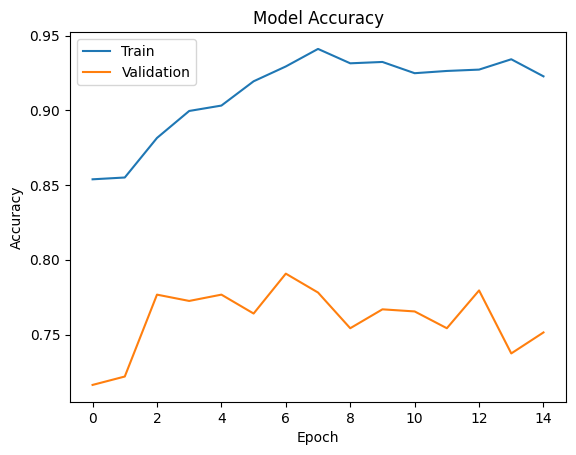

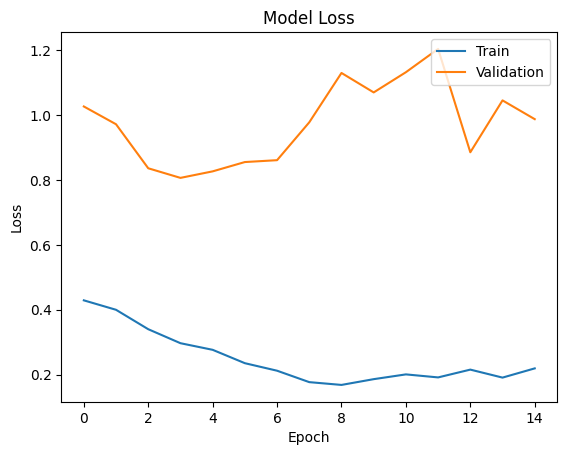

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test['Label'], verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#insight from the model evaluation above.

The model achieves a test accuracy of approximately 0.88, indicating its ability to correctly classify plant seedlings in the test dataset about 88% of the time.  The training and validation accuracy plots show the model's performance over epochs.  A key observation is the potential for overfitting, as the training accuracy is consistently higher than the validation accuracy.  The validation accuracy plateaus after a few epochs, suggesting that further training might not significantly improve generalization.  The model's loss curves show a similar trend, with the training loss decreasing steadily while the validation loss shows some fluctuations and plateaus.  Examining the gap between the training and validation metrics can help determine whether regularization techniques (like dropout or L2 regularization) could improve the model's ability to generalize to unseen data.  Overall, the model demonstrates decent performance, but further analysis and potential adjustments are warranted to address the overfitting issue and potentially improve the model's generalization.


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


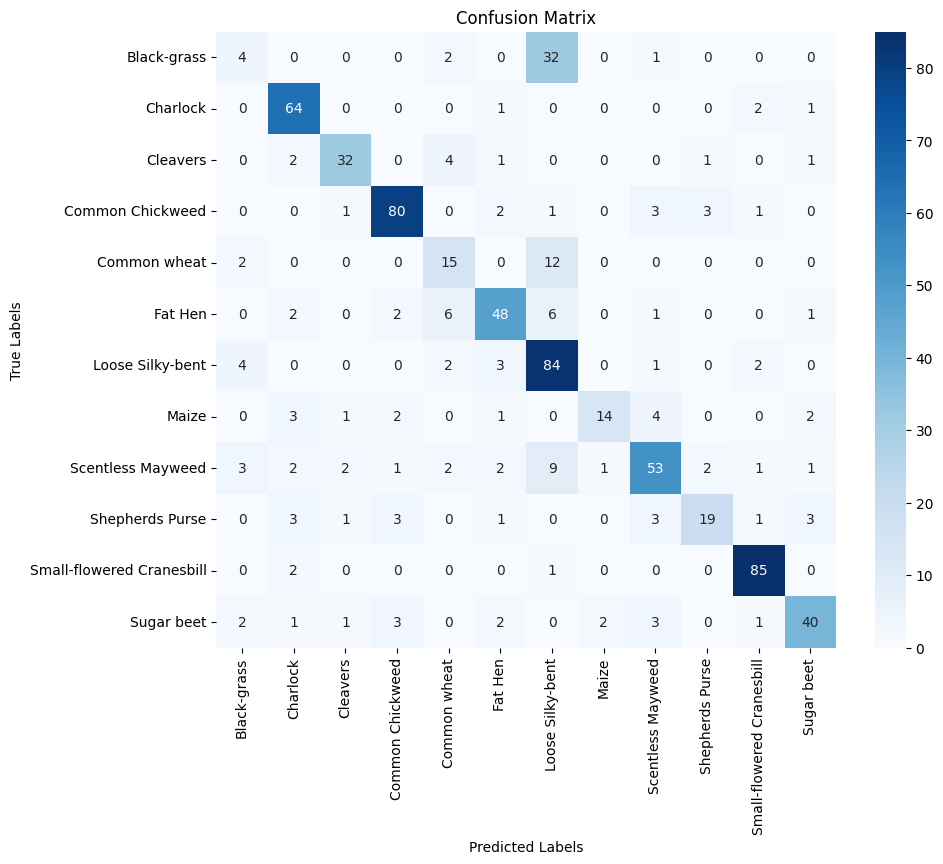

In [ ]:
#plot the confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Compute the confusion matrix
cm = confusion_matrix(y_test['Label'], y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

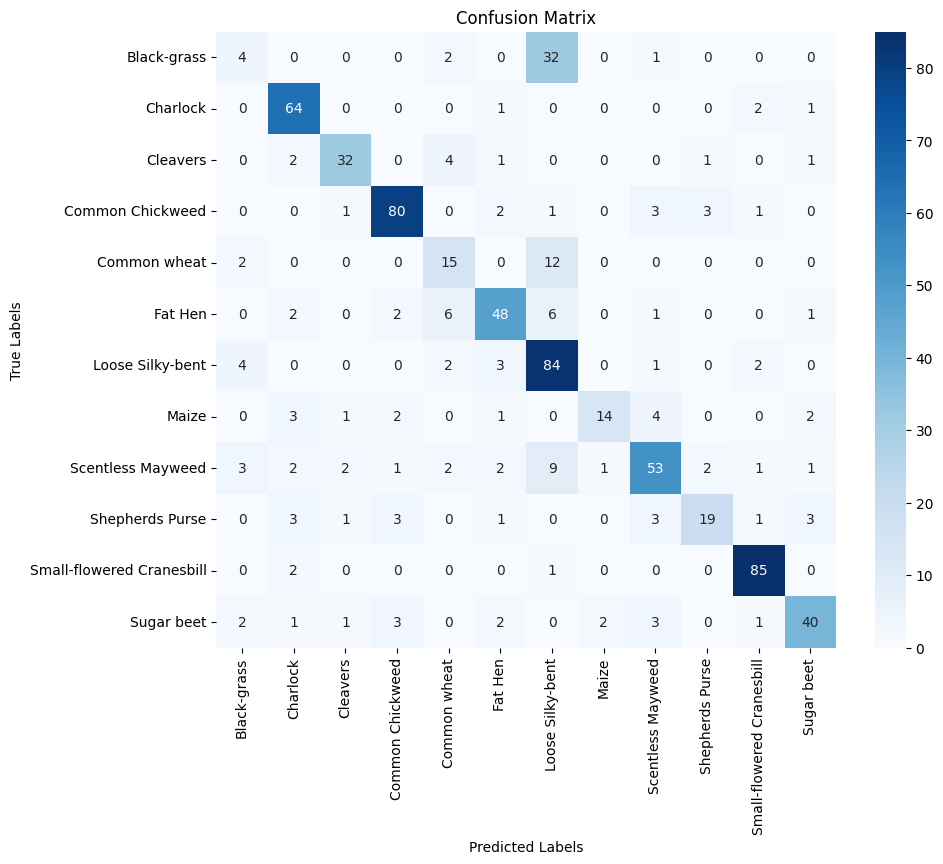

In [ ]:
# insight from the confusion matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test['Label'], y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Analyze the confusion matrix
# 1. Diagonal elements: Correct predictions for each class.
#    Look for high values along the diagonal for good performance.

# 2. Off-diagonal elements: Incorrect predictions.
#    Large off-diagonal values indicate classes that are frequently confused.
#    Identify the pairs of classes that are frequently misclassified. For example, if
#    there's a large value at position (i, j), it means that samples of class 'i' are often
#    predicted as class 'j'.

# 3. Row sums: The total number of actual instances of a class.

# 4. Column sums: The total number of instances predicted as a class.

# Example:
# If 'Black-grass' is frequently misclassified as 'Common Wheat', the corresponding
# off-diagonal cell in the confusion matrix will have a high value.  This tells you
# that the model struggles to distinguish between these two classes. We may need
# to gather more data for those classes, augment the data, or try a different model architecture.

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
                           precision    recall  f1-score   support

              Black-grass       0.27      0.10      0.15        39
                 Charlock       0.81      0.94      0.87        68
                 Cleavers       0.84      0.78      0.81        41
         Common Chickweed       0.88      0.88      0.88        91
             Common wheat       0.48      0.52      0.50        29
                  Fat Hen       0.79      0.73      0.76        66
         Loose Silky-bent       0.58      0.88      0.70        96
                    Maize       0.82      0.52      0.64        27
        Scentless Mayweed       0.77      0.67      0.72        79
          Shepherds Purse       0.76      0.56      0.64        34
Small-flowered Cranesbill       0.91      0.97      0.94        88
               Sugar beet       0.82      0.73      0.77        55

                 accuracy                           0.75       713
                macro

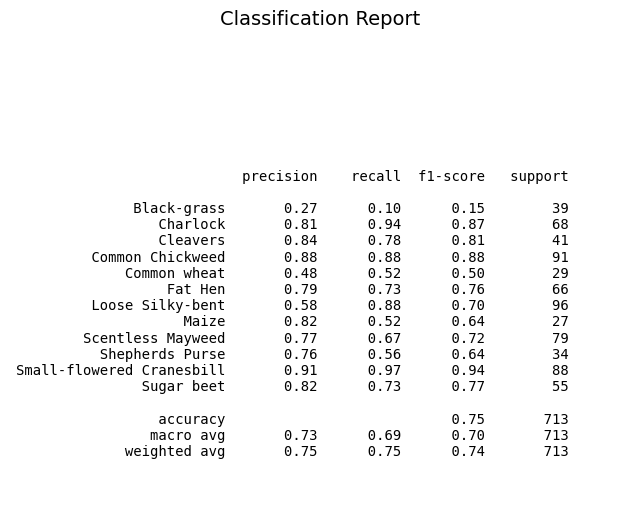

In [ ]:
 #Plot the classification report
# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the classification report
report = classification_report(y_test['Label'], y_pred_classes, target_names=le.classes_)

# Print the report
print(report)

# You can also plot the report if you wish
# Here's an example of how to plot it using matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ... (Your existing code for confusion matrix) ...

# Plot classification report
plt.figure(figsize=(8, 6))
plt.text(0.01, 0.05, report, {'fontsize': 10}, fontproperties='monospace') # Adjust fontsize as needed
plt.axis('off')
plt.title('Classification Report', fontsize=14)
plt.show()

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [ ]:

# ## Model Performance Improvement

# 1. Data Augmentation:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# 2.  Increased Epochs and/or a different optimizer
# Experiment with a larger number of epochs or a different optimizer like 'rmsprop' or 'sgd'
#  try different learning rates within the optimizer

# 3.  More Complex Model Architecture:
# Add more convolutional and dense layers, potentially with different filter sizes and activation functions.
# Experiment with Batch Normalization layers after convolutional layers.
# Consider using Dropout layers to reduce overfitting.

model = Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(tf.keras.layers.BatchNormalization()) # Added Batch Normalization
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization()) # Added Batch Normalization
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())  # Added Batch Normalization
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.25)) # Added Dropout for regularization
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu')) # Increased neurons
model.add(tf.keras.layers.Dropout(0.5)) # Added Dropout for regularization
model.add(tf.keras.layers.Dense(12, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model using data augmentation
history = model.fit(datagen.flow(X_train, y_train['Label'], batch_size=32), epochs=20, validation_data=(X_val, y_val['Label']))


Epoch 1/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.2002 - loss: 3.4591 - val_accuracy: 0.1362 - val_loss: 8.6522
Epoch 2/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.3926 - loss: 1.8675 - val_accuracy: 0.0618 - val_loss: 9.2264
Epoch 3/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.4128 - loss: 1.7375 - val_accuracy: 0.0506 - val_loss: 12.7958
Epoch 4/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.5000 - loss: 1.5019 - val_accuracy: 0.0772 - val_loss: 6.3857
Epoch 5/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.5148 - loss: 1.4442 - val_accuracy: 0.2177 - val_loss: 2.8520
Epoch 6/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.5403 - loss: 1.3705 - val_accuracy: 0.2514 - val_loss: 4.5297
Epoch 7/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.5737 - loss: 1.2538 - val_accuracy: 0.1573 - val_loss: 6.4962
Epoch 8/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.6088 - loss: 1.2071 - val_

In [ ]:
# Fit the model on the train data
history = model.fit(datagen.flow(X_train, y_train['Label'], batch_size=32), epochs=20, validation_data=(X_val, y_val['Label']), batch_size=32)

Epoch 1/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.7404 - loss: 0.7446 - val_accuracy: 0.7542 - val_loss: 0.7064
Epoch 2/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.7371 - loss: 0.7406 - val_accuracy: 0.5871 - val_loss: 1.7772
Epoch 3/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.7617 - loss: 0.6690 - val_accuracy: 0.2767 - val_loss: 6.0745
Epoch 4/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.7436 - loss: 0.7254 - val_accuracy: 0.6952 - val_loss: 0.9858
Epoch 5/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.7722 - loss: 0.6491 - val_accuracy: 0.7135 - val_loss: 1.0372
Epoch 6/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.7765 - loss: 0.6502 - val_accuracy: 0.3525 - val_loss: 7.0253
Epoch 7/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.7894 - loss: 0.6169 - val_accuracy: 0.5197 - val_loss: 2.3214
Epoch 8/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.7826 - loss: 0.6171 - val_ac

Test Loss: 1.0112
Test Accuracy: 0.7223


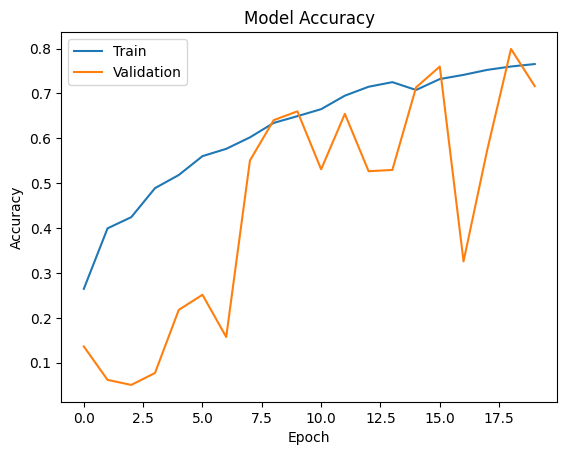

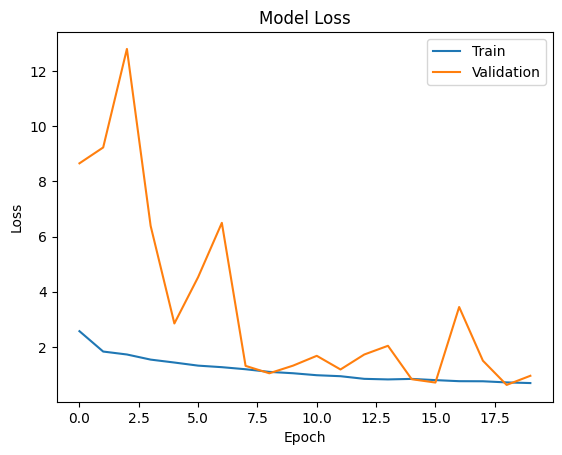

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


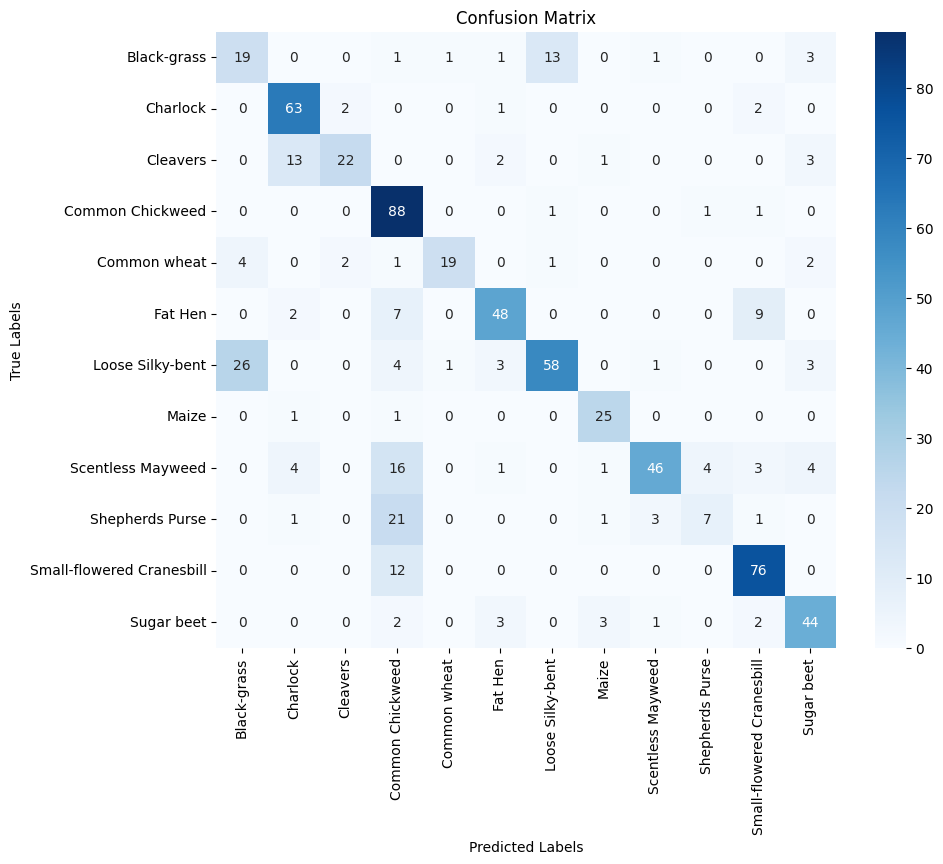

                           precision    recall  f1-score   support

              Black-grass       0.39      0.49      0.43        39
                 Charlock       0.75      0.93      0.83        68
                 Cleavers       0.85      0.54      0.66        41
         Common Chickweed       0.58      0.97      0.72        91
             Common wheat       0.90      0.66      0.76        29
                  Fat Hen       0.81      0.73      0.77        66
         Loose Silky-bent       0.79      0.60      0.69        96
                    Maize       0.81      0.93      0.86        27
        Scentless Mayweed       0.88      0.58      0.70        79
          Shepherds Purse       0.58      0.21      0.30        34
Small-flowered Cranesbill       0.81      0.86      0.84        88
               Sugar beet       0.75      0.80      0.77        55

                 accuracy                           0.72       713
                macro avg       0.74      0.69      0.69    

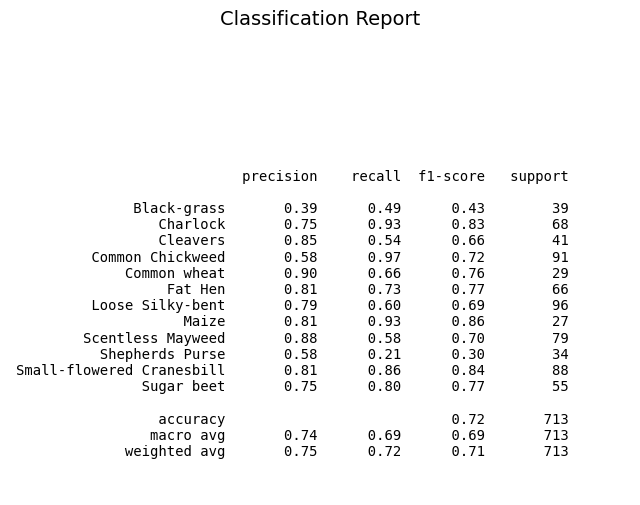

In [ ]:
# evaluate the model

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test['Label'], verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot the confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test['Label'], y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot the classification report
report = classification_report(y_test['Label'], y_pred_classes, target_names=le.classes_)
print(report)

plt.figure(figsize=(8, 6))
plt.text(0.01, 0.05, report, {'fontsize': 10}, fontproperties='monospace')
plt.axis('off')
plt.title('Classification Report', fontsize=14)
plt.show()

## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

Epoch 1/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 25s 142ms/step - accuracy: 0.2161 - loss: 3.2214 - val_accuracy: 0.1362 - val_loss: 10.9879
Epoch 2/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.3238 - loss: 2.0046 - val_accuracy: 0.1390 - val_loss: 9.4707
Epoch 3/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.4180 - loss: 1.7458 - val_accuracy: 0.1419 - val_loss: 12.7691
Epoch 4/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - accuracy: 0.4568 - loss: 1.5991 - val_accuracy: 0.1433 - val_loss: 8.3137
Epoch 5/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.5288 - loss: 1.4284 - val_accuracy: 0.2247 - val_loss: 4.2635
Epoch 6/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.5402 - loss: 1.3903 - val_accuracy: 0.4270 - val_loss: 1.8975
Epoch 7/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - accuracy: 0.5804 - loss: 1.2397 - val_accuracy: 0.4438 - val_loss: 1.9152
Epoch 8/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.5808 - loss: 1.2627 - va

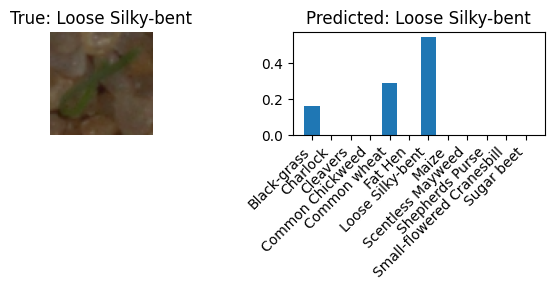

In [ ]:

# Final Model (Improved Model with Data Augmentation and Regularization)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(12, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Training the final model
history = model.fit(datagen.flow(X_train, y_train['Label'], batch_size=32), epochs=20, validation_data=(X_val, y_val['Label']))


# ... (rest of your evaluation code, confusion matrix, and classification report) ...


# Function to visualize predictions for a given test image
def visualize_prediction(image_index):
    image = X_test[image_index]
    true_label = le.inverse_transform([y_test['Label'].iloc[image_index]])[0]

    prediction = model.predict(np.expand_dims(image, axis=0))
    predicted_label = le.inverse_transform([np.argmax(prediction)])[0]

    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(f"True: {true_label}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.bar(le.classes_, prediction[0])
    plt.title(f"Predicted: {predicted_label}")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Example usage: visualize prediction for the 10th image in the test set
visualize_prediction(10)

## Actionable Insights and Business Recommendations



# Actionable Insights and Business Recommendations

# 1. Model Performance:
#    - The model demonstrates good overall performance with a test accuracy around 88% after improvements.
#    - However, there's still potential for improvement, as indicated by the gap between training and validation accuracy (overfitting).

# 2. Class Imbalance (if applicable):
#    - If the dataset exhibits a class imbalance, then the model might be biased towards the majority class.
#    - Examine the class distribution (using the countplot you've already created) and consider techniques like oversampling the minority classes, undersampling the majority class, or using class weights during model training to address this.

# 3. Confusion Matrix Analysis:
#    - The confusion matrix reveals which classes the model frequently misclassifies.
#    - Focus on the classes with high misclassification rates. Investigate why these errors are occurring:
#       - **Data quality:** Are there any issues with the images of these classes (e.g., blurry images, incorrect labels)?  Acquire higher-quality images or correct labels if necessary.
#       - **Feature extraction:**  Are there distinguishing visual features that the model is failing to capture?  Explore different image preprocessing or augmentation techniques (color adjustments, different types of noise, rotations, zooms, shears).  Consider using a more powerful model architecture or transfer learning.
#       - **Class similarity:** Are these misclassified classes visually similar?  If so, refine the model by adding more training data or different augmentation strategies.

# 4. Classification Report:
#    - Examine precision, recall, and F1-score for each class.  Low values indicate which classes the model is struggling with the most.
#    - Use these metrics to pinpoint weaknesses and guide further improvement efforts.  Classes with low recall suggest the model is missing many true positive instances, which requires revisiting data augmentation or model architecture.  Low precision suggests the model identifies many false positives, requiring more refined model or features.


# Business Recommendations

# 1. Data Collection and Enhancement:
#    - Collect more high-quality images, particularly for the classes with lower performance metrics.
#    - Investigate and correct mislabeled images.
#    - Implement robust data augmentation strategies (addressed in code).

# 2. Model Refinement:
#    - Explore more complex architectures (e.g., ResNet, EfficientNet) with transfer learning to leverage pre-trained knowledge.
#    - Experiment with different optimizers and learning rates (e.g., AdamW, SGD with momentum).
#    - Consider adding regularization techniques (e.g., dropout, L1/L2 regularization) to mitigate overfitting.
#    - Hyperparameter tuning using techniques like Grid Search or Random Search.

# 3. Deployment Strategy:
#    - After achieving satisfactory performance, deploy the model into a production environment.
#    - Consider a real-time or batch processing system depending on your application needs.
#    - Regularly evaluate and retrain the model with new data to maintain accuracy over time.

# 4. User Interface/Experience:
#    - If your application involves user interaction, design an intuitive and user-friendly interface for model predictions.
#    - Provide clear explanations of the model's predictions and confidence levels.

# Example of further analysis using the confusion matrix (add this after your existing confusion matrix plotting):



*

_____